In [ ]:
# Importando dependências

import numpy as np
import torch
import torch.nn as nn

from torchvision.models import vgg16

In [ ]:
# Instanciando o modelo

model = vgg16(pretrained=True)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Criando nossa imagem

image_tensor = torch.randn(size=(1, 3, 32, 32)).float()
image_tensor

tensor([[[[-1.6561e+00,  1.8700e+00,  7.8010e-01,  ..., -1.4730e+00,
            2.4548e-01, -1.7381e-01],
          [-8.5187e-02, -5.0123e-01, -1.1396e-01,  ...,  1.1303e-01,
           -3.2402e-01,  4.7396e-01],
          [ 1.7901e-01, -3.4751e-01, -2.4316e-01,  ...,  7.3942e-01,
           -1.3595e+00,  1.0057e+00],
          ...,
          [ 8.9297e-01, -4.1483e-01,  6.7478e-01,  ...,  2.2425e+00,
           -5.7253e-01, -6.0505e-01],
          [ 1.7804e+00, -1.0605e+00,  4.0408e-01,  ..., -3.5086e-01,
            7.1141e-01, -9.5012e-01],
          [-8.2937e-01, -7.9258e-01,  1.2073e+00,  ..., -3.5753e-01,
            7.2848e-01, -4.1806e-01]],

         [[ 2.7505e-01,  6.0758e-01,  1.5959e+00,  ...,  2.2421e+00,
           -1.2175e+00, -7.5543e-02],
          [ 4.3788e-01,  5.5548e-01, -1.9321e+00,  ..., -1.0961e+00,
           -6.7196e-01,  8.1762e-01],
          [-2.2061e-01, -6.4961e-01, -1.2772e+00,  ...,  1.1025e+00,
           -5.0811e-01, -1.1812e+00],
          ...,
     

In [ ]:
# Criando Hook

import matplotlib.pyplot as plt
import math
import numpy as np

def hook(layer, inputs, outputs):
    weights = layer.weight.data
    num_images = len(weights)
    cols = 5  # Máximo de 5 imagens por linha
    rows = math.ceil(num_images / cols)  # Calcula o número de linhas necessário

    # Ajusta o tamanho da figura para acomodar todas as imagens
    plt.figure(figsize=(cols * 2, rows * 2))

    for i in range(num_images):
        # Seleciona a primeira dimensão espacial se o tensor for 3D ou 4D
        weight_matrix = weights[i].detach().numpy()
        if weight_matrix.ndim > 2:  # Reduz para 2D, por exemplo, para [C, H, W]
            weight_matrix = weight_matrix[0]  # Seleciona o primeiro canal (ajuste conforme necessário)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(weight_matrix, cmap='viridis')  # Adicione um cmap se necessário
        plt.axis('off')  # Remove os eixos

        # Adiciona os valores dos pesos na imagem
        for (x, y), value in np.ndenumerate(weight_matrix):
            plt.text(y, x, f'{value:.2f}', color='white', ha='center', va='center', fontsize=12)

    plt.tight_layout()  # Ajusta os espaçamentos automaticamente
    plt.show()

In [ ]:
# Associando o foward hook ao nosso modelo na primeira camada convolucional

handle = model.features[0].register_forward_hook(hook)

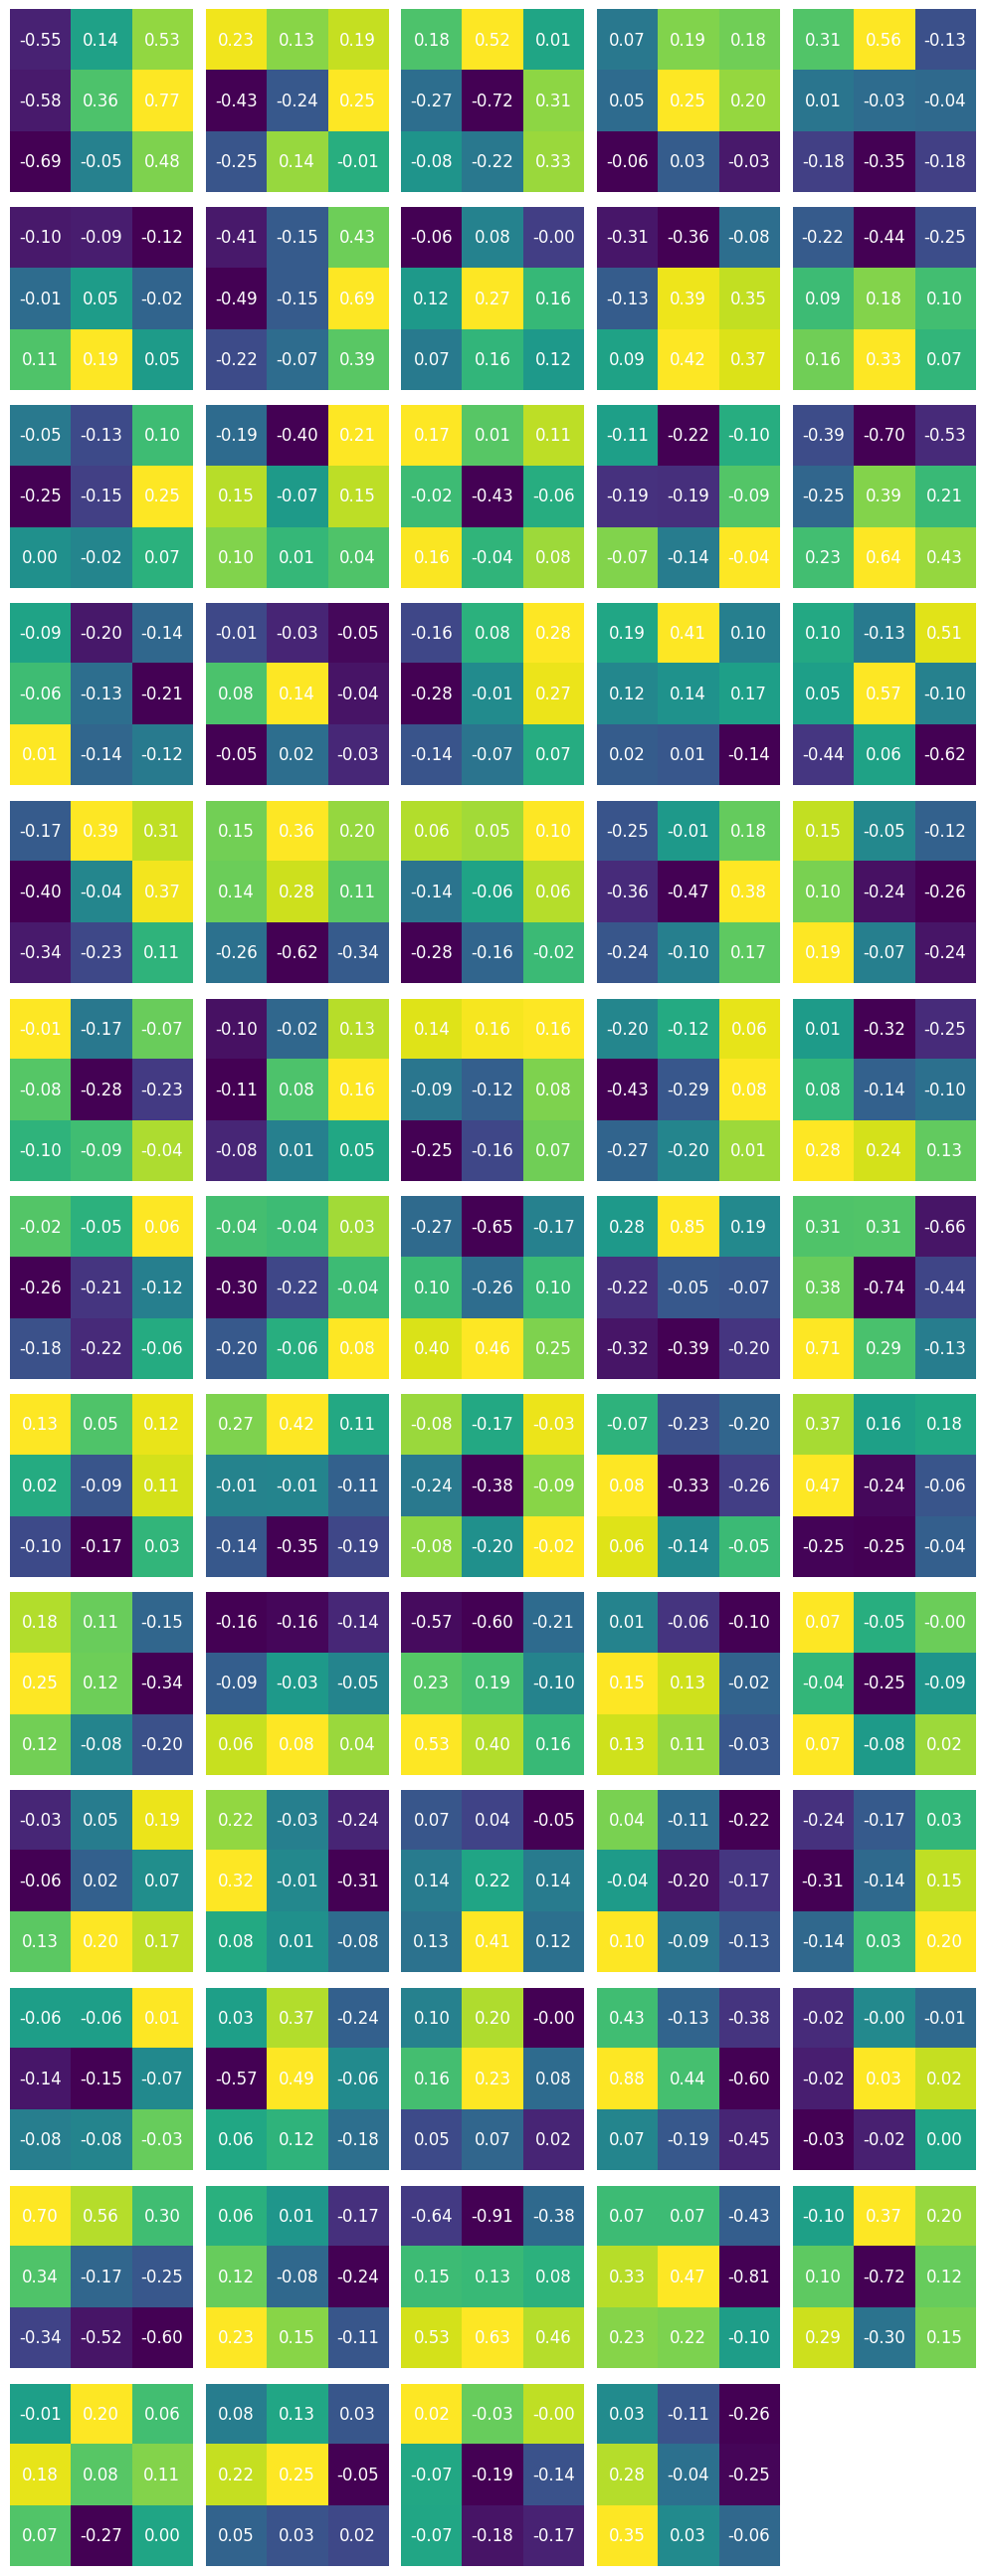

tensor([[-1.5876e+00, -3.3868e+00, -8.0958e+00, -7.9521e+00, -7.3163e+00,
          1.9517e+00,  1.6038e-01,  1.4634e+00, -6.4111e-01, -3.2933e+00,
         -7.2155e+00, -3.3641e+00, -7.1873e+00, -6.2634e+00,  7.4348e+00,
         -7.5529e+00, -9.4863e+00,  2.0209e+00,  1.3061e+00, -8.1261e+00,
         -8.0361e+00, -1.1619e+01, -1.0964e+01, -6.4186e+00, -5.5879e+00,
         -2.6692e+00, -7.5647e-01, -2.0264e+00, -3.5899e+00, -5.1895e+00,
         -8.2694e-01, -2.4807e+00,  5.6204e+00, -2.0518e+00, -1.4175e-01,
         -2.5113e+00, -1.5283e+00, -1.2103e+00,  2.7920e+00, -8.2788e-01,
          1.4233e+00, -5.9298e-02,  6.5532e+00, -4.8654e-01,  1.0263e+00,
          7.4549e+00,  4.7378e+00,  1.0674e+01, -2.2955e-01,  1.3041e+00,
         -2.0244e-01, -5.9432e-01, -4.9408e+00, -1.0652e+01,  3.0882e+00,
         -1.1622e+00, -2.9990e+00, -8.0021e-01, -8.6984e-01, -8.7863e-02,
          2.5334e+00, -2.8406e+00, -2.6934e+00, -2.9454e+00, -4.5768e-01,
          5.2890e+00,  1.0685e+00, -9.

In [ ]:
# Executando o modelo

model(image_tensor)

In [ ]:
handle.remove()